In [77]:
# 將 .json 檔直接轉成 .csv 檔後讀取使用
from nltk.twitter.common import json2csv  #nltk:自然語言處理
# 針對 text 欄位進行特徵提取，例如取 hashtags、user_mentions、 media_url ( 圖片網址 )、url ( 前往連結 ) 等
from nltk.twitter.common import json2csv_entities
# sample(): 取資料
from nltk.corpus import twitter_samples
# TweetViewer 為瀏覽資料，TweetWriter 為寫入檔案，streamer:抓取資料
from nltk.twitter import Query, Streamer, Twitter, TweetViewer, TweetWriter, credsfromfile
import nltk
nltk.download('twitter_samples')
import pandas as pd

[nltk_data] Downloading package twitter_samples to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


In [78]:
oauth = credsfromfile()  # 預設搜尋 credentials.txt(放token的地方)
# api = twitter.Api(  
#     consumer_key='225YhdtqjCIoSv5kkeJ00aDPP',  
#     consumer_secret= 'QJAyfDRQ10LVdwzrdW91GtTEvRyF6p1xsjSCCaBxlbblHKlxqQ',
#     access_token_key= '848030910230310912-o2wBZggtAm0bYvEcZc2R9nQg7tJOTDU',  
#     access_token_secret= '4PqwwY8BRc6XwaqvtOPb9SXRvFeBuYpnXjzKOHihab77s',  
# )  
n = 100  # 拿取 tweets 資料則數
username = 'realDonaldTrump' #用戶名稱
client = Query(**oauth)   
client.register(TweetWriter()) # 把拿到的結果寫入
client.user_tweets(username, n) # 拿取 user tweets資料

Writing to C:\Users\ACER\twitter-files\tweets.20200309-105411.json


In [83]:
# 使用 json2csv 存取 tweets 資料 
file = twitter_samples.abspath('C:\\Users\\ACER\\twitter-files\\tweets.20200309-105411.json') 
with open(file) as f:
    json2csv(f, 'tweets_text.csv', ['text']) #把.json轉成.csv，選取text欄位
data = pd.read_csv('tweets_text.csv')
i = 1
for l in data.text:
    print(i,'.',l)
    i += 1

1 . Who knows what this means, but it sounds good to me! https://t.co/rQVA4ER0PV
2 . The New York Times is an embarrassment to journalism. They were a dead paper before I went into politics, and they… https://t.co/G9kUZ9DDfV
3 . We have a perfectly coordinated and fine tuned plan at the White House for our attack on CoronaVirus. We moved VERY… https://t.co/ryorfT5yde
4 . Thank you @SenatorTimScott!
https://t.co/7Sp0mj1AL0
5 . .....least 5 States &amp; the Nomination. Did the DNC &amp; Dems tell Elizabeth Warren to wait? If so, they were deadly, th… https://t.co/mbzlAvP24C
6 . We have now learned for sure that the Democrats don’t want anything to do with Crazy Bernie. Rigged? First… https://t.co/5xOCT7xsNt
7 . I agree with Joe! https://t.co/h84mD7jVPW
8 . Thank you to the Great State of Tennessee. We are with you all the way! https://t.co/vyu0Tbthv0
9 . Thank you @GovBillLee and @MariaLeeTN. My Administration will always be there for the Great People of Tennessee. To… https://t.co/1WSom

In [84]:
print(data)

                                                 text
0   Who knows what this means, but it sounds good ...
1   The New York Times is an embarrassment to jour...
2   We have a perfectly coordinated and fine tuned...
3   Thank you @SenatorTimScott!\r\nhttps://t.co/7S...
4   .....least 5 States &amp; the Nomination. Did ...
..                                                ...
56  Wow! If Elizabeth Warren wasn’t in the race, B...
57  The great people of Montana can have no better...
58  I will be going to the Great State of Tennesse...
59  MAKE AMERICA GREAT AGAIN and then, KEEP AMERIC...
60  This is what happens to someone who loyally ge...

[61 rows x 1 columns]


In [85]:
# nltk有斷詞功能
tokenized = twitter_samples.tokenized(file)
for t in tokenized:
    print(t)

['Who', 'knows', 'what', 'this', 'means', ',', 'but', 'it', 'sounds', 'good', 'to', 'me', '!', 'https://t.co/rQVA4ER0PV']
['The', 'New', 'York', 'Times', 'is', 'an', 'embarrassment', 'to', 'journalism', '.', 'They', 'were', 'a', 'dead', 'paper', 'before', 'I', 'went', 'into', 'politics', ',', 'and', 'they', '…', 'https://t.co/G9kUZ9DDfV']
['We', 'have', 'a', 'perfectly', 'coordinated', 'and', 'fine', 'tuned', 'plan', 'at', 'the', 'White', 'House', 'for', 'our', 'attack', 'on', 'CoronaVirus', '.', 'We', 'moved', 'VERY', '…', 'https://t.co/ryorfT5yde']
['Thank', 'you', '@SenatorTimScott', '!', 'https://t.co/7Sp0mj1AL0']
['...', 'least', '5', 'States', '&', 'the', 'Nomination', '.', 'Did', 'the', 'DNC', '&', 'Dems', 'tell', 'Elizabeth', 'Warren', 'to', 'wait', '?', 'If', 'so', ',', 'they', 'were', 'deadly', ',', 'th', '…', 'https://t.co/mbzlAvP24C']
['We', 'have', 'now', 'learned', 'for', 'sure', 'that', 'the', 'Democrats', 'don', '’', 't', 'want', 'anything', 'to', 'do', 'with', 'Crazy',

In [86]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# wordcloud = WordCloud().generate()
text = ''
for se in tokenized:
    for wd in se:
        text = text + wd + ','
print(text)

Who,knows,what,this,means,,,but,it,sounds,good,to,me,!,https://t.co/rQVA4ER0PV,The,New,York,Times,is,an,embarrassment,to,journalism,.,They,were,a,dead,paper,before,I,went,into,politics,,,and,they,…,https://t.co/G9kUZ9DDfV,We,have,a,perfectly,coordinated,and,fine,tuned,plan,at,the,White,House,for,our,attack,on,CoronaVirus,.,We,moved,VERY,…,https://t.co/ryorfT5yde,Thank,you,@SenatorTimScott,!,https://t.co/7Sp0mj1AL0,...,least,5,States,&,the,Nomination,.,Did,the,DNC,&,Dems,tell,Elizabeth,Warren,to,wait,?,If,so,,,they,were,deadly,,,th,…,https://t.co/mbzlAvP24C,We,have,now,learned,for,sure,that,the,Democrats,don,’,t,want,anything,to,do,with,Crazy,Bernie,.,Rigged,?,First,…,https://t.co/5xOCT7xsNt,I,agree,with,Joe,!,https://t.co/h84mD7jVPW,Thank,you,to,the,Great,State,of,Tennessee,.,We,are,with,you,all,the,way,!,https://t.co/vyu0Tbthv0,Thank,you,@GovBillLee,and,@MariaLeeTN,.,My,Administration,will,always,be,there,for,the,Great,People,of,Tennessee,.,To,…,https://t.co/1WSom7Qt3C,...,I,want,to,t

In [87]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = set(stopwords.words('english'))
stopwords.add('https')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ACER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


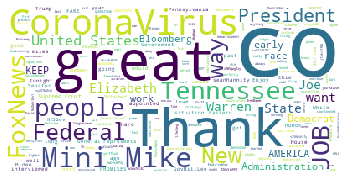

In [88]:
wc = WordCloud(background_color="white",  stopwords=stopwords).generate(text)
plt.imshow(wc)
plt.axis("off")
plt.show()